<a href="https://colab.research.google.com/github/akash-agni/Machine_Learning/blob/master/Credit_Card_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Customer Churn Analysis

Hello There!! Been a long time since I uploaded anything, might have some rough edges, apologies for that, do point out any issues in comments.

So this Dataset really drew my attention in last few days, as someone working in Finance, it seemed really intreasting to look into, and man did I enjoy working on it...

So the basic idea is as below.

<I><b>Business manager of a consumer credit card portfolio of a bank is facing severe customer attrition problem in the recent months. This is impacting the business. The business manager wants to leverage the power of data analytics to understand the primary reasons of attrition. She also wants to have an ability to understand the customers who are likely to close their accounts with the bank in near future, so that she can focus her efforts, well in advance to retain those customers.</b></I>

So lets put on our analytics hats and help out our friend here, below are the steps and we will try to find a viable solution to this guys problem in the smallest amount of time possible, dont wanna spend entire day here do we.

<h4>
<ol>
    <li>Data Loading</li>
    <li>Data Cleaning</li>
    <li>Univariant Analysis</li>
    <li>Multivariant Analysis</li>
    <li>Feature Engineering</li>
    <li>Model Development</li>
    <li>Results Analysis</li>
    <li>Conclusion</li>
</ol>
</h4>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as ss

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as mtr

In [7]:
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [8]:
from google.colab import files

uploaded = files.upload()

In [9]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

In [10]:
df = pd.read_csv('BankChurners.csv')
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns")

df.head(5)

Data has 10127 rows and 23 columns


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data Cleaning

In [11]:
# Lets drop 2 unnessecery columns, or probably very useful,who know!!
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)

In [12]:
# Lets get info on columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [13]:
print("Nubmber of Duplicate Rows: ",df.duplicated().sum())

Nubmber of Duplicate Rows:  0


In [14]:
print(f"How pure is primary key 'CLIENTNUM': {len(df['CLIENTNUM'].unique())/len(df) * 100}%")

How pure is primary key 'CLIENTNUM': 100.0%


#### No Null, No Duplicates, No Overlapping keys, this is what analytics heaven must feel like

## Univariant Analysis

In [15]:
# Function to get Descriptive Analysis of Numeric columns
def Numeric_Analysis(x):
    print('='*40)
    print(f'Descriptive Statistics of {x.name}')
    print('='*40)
    print(x.describe())
    print('='*40)
    print(f"Probability Density Plot for {x.name}")
    print('='*40)
    ax,fig = plt.subplots(figsize=(8,4))
    fig = sns.kdeplot(x.values,shade=True)
    fig = plt.xlabel(x.name)
    plt.show()

# Function to get Descriptive Analysis of Categorical columns
def Categorical_Analysis(x):
    print('='*40)
    print(f'One-Way Frequency Table of {x.name}')
    print('='*40)
    desc = pd.DataFrame(x.value_counts())
    desc.columns = ['Frequency']
    desc['Percentage'] = np.round((x.value_counts()/len(df) * 100).values,3)
    print(desc)
    print('='*40)
    fig,ax = plt.subplots(figsize=(8,6))
    print(f'One-Way Frequency Plot of {x.name}')
    print('='*40)
    fig = sns.barplot(x=desc.index,y=desc['Percentage'].values)
    fig.plot()
    fig = plt.ylabel('Percentage')
    fig = plt.xlabel(x.name)
    plt.show()

One-Way Frequency Table of Attrition_Flag
                   Frequency  Percentage
Existing Customer       8500      83.934
Attrited Customer       1627      16.066
One-Way Frequency Plot of Attrition_Flag


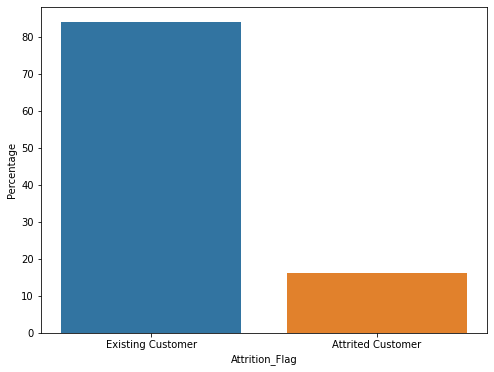

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Customer_Age
count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64
Probability Density Plot for Customer_Age


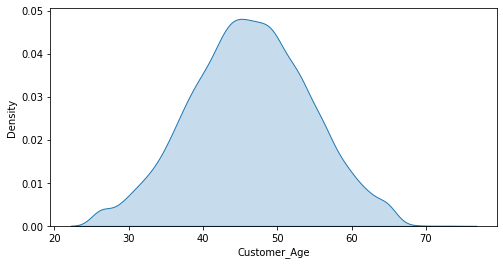

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
One-Way Frequency Table of Gender
   Frequency  Percentage
F       5358      52.908
M       4769      47.092
One-Way Frequency Plot of Gender


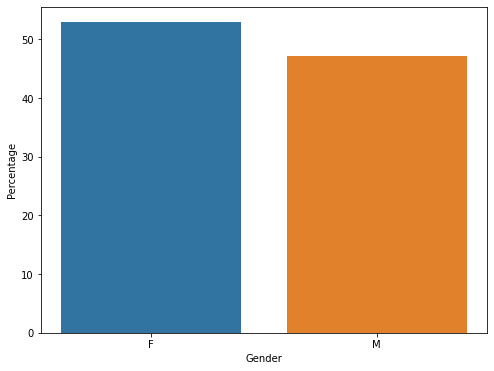

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Dependent_count
count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Dependent_count, dtype: float64
Probability Density Plot for Dependent_count


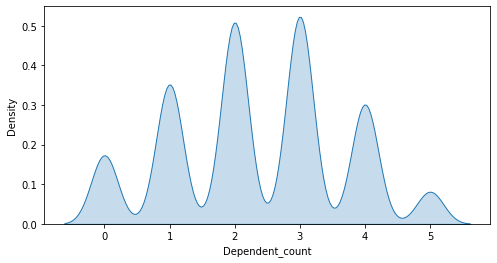

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
One-Way Frequency Table of Education_Level
               Frequency  Percentage
Graduate            3128      30.888
High School         2013      19.878
Unknown             1519      15.000
Uneducated          1487      14.684
College             1013      10.003
Post-Graduate        516       5.095
Doctorate            451       4.453
One-Way Frequency Plot of Education_Level


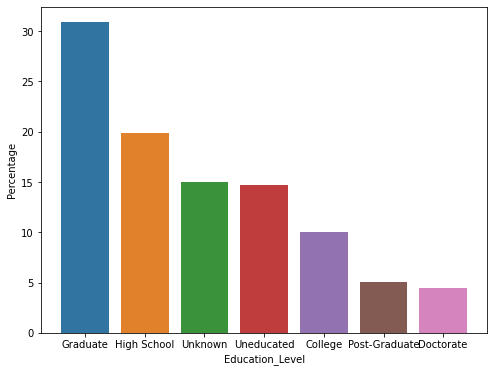

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
One-Way Frequency Table of Marital_Status
          Frequency  Percentage
Married        4687      46.282
Single         3943      38.936
Unknown         749       7.396
Divorced        748       7.386
One-Way Frequency Plot of Marital_Status


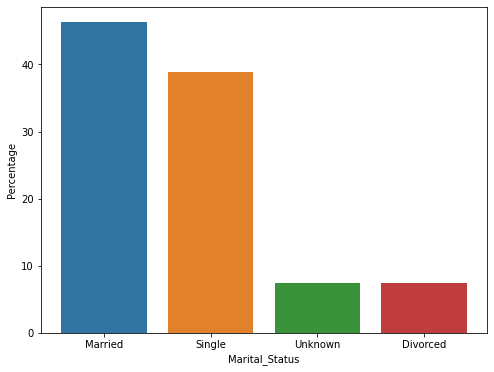

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
One-Way Frequency Table of Income_Category
                Frequency  Percentage
Less than $40K       3561      35.163
$40K - $60K          1790      17.676
$80K - $120K         1535      15.157
$60K - $80K          1402      13.844
Unknown              1112      10.981
$120K +               727       7.179
One-Way Frequency Plot of Income_Category


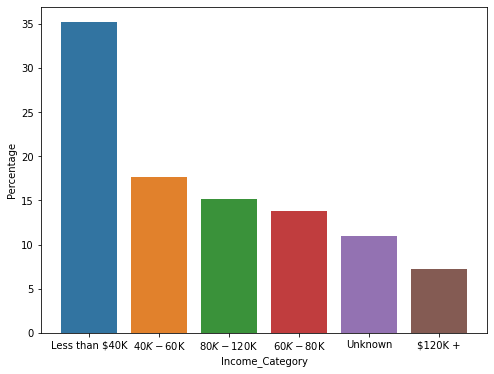

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
One-Way Frequency Table of Card_Category
          Frequency  Percentage
Blue           9436      93.177
Silver          555       5.480
Gold            116       1.145
Platinum         20       0.197
One-Way Frequency Plot of Card_Category


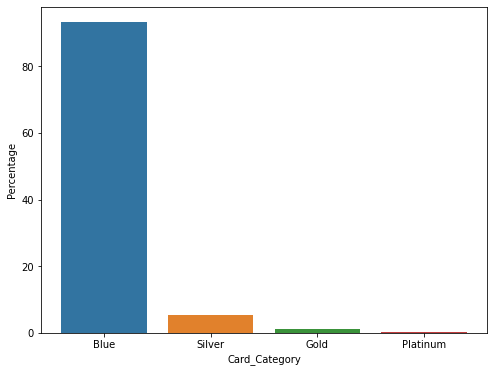

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Months_on_book
count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64
Probability Density Plot for Months_on_book


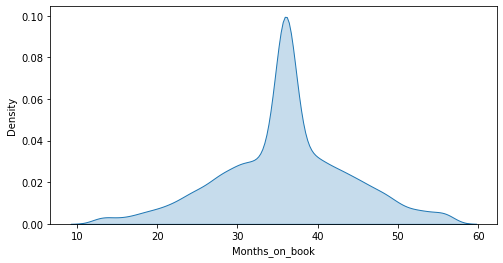

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Total_Relationship_Count
count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64
Probability Density Plot for Total_Relationship_Count


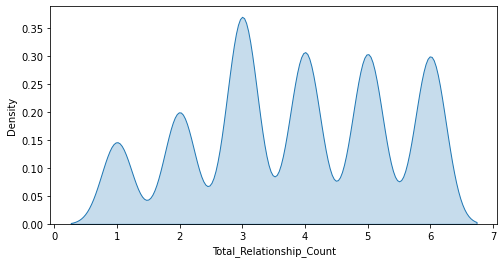

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Months_Inactive_12_mon
count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Months_Inactive_12_mon, dtype: float64
Probability Density Plot for Months_Inactive_12_mon


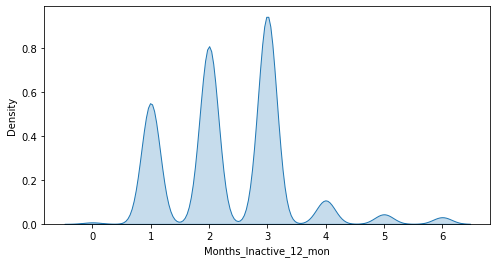

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Contacts_Count_12_mon
count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Contacts_Count_12_mon, dtype: float64
Probability Density Plot for Contacts_Count_12_mon


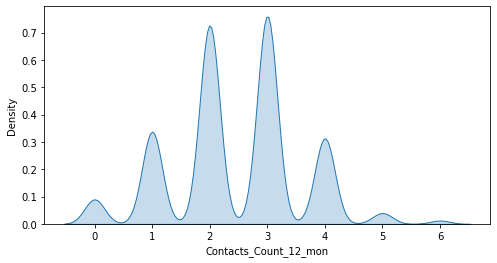

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Credit_Limit
count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64
Probability Density Plot for Credit_Limit


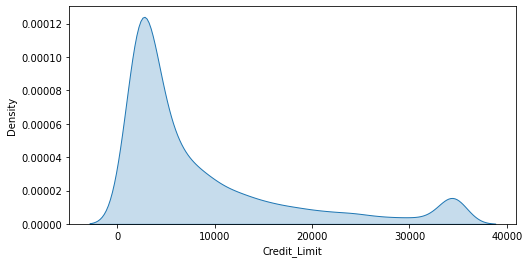

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Total_Revolving_Bal
count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64
Probability Density Plot for Total_Revolving_Bal


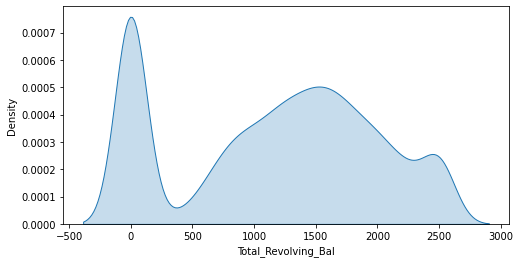

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Avg_Open_To_Buy
count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64
Probability Density Plot for Avg_Open_To_Buy


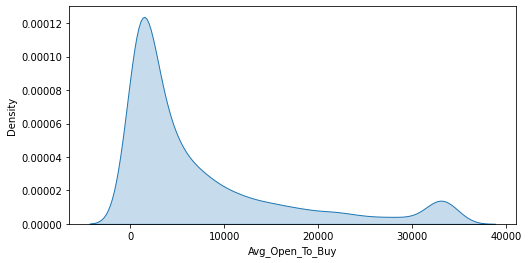

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Total_Amt_Chng_Q4_Q1
count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64
Probability Density Plot for Total_Amt_Chng_Q4_Q1


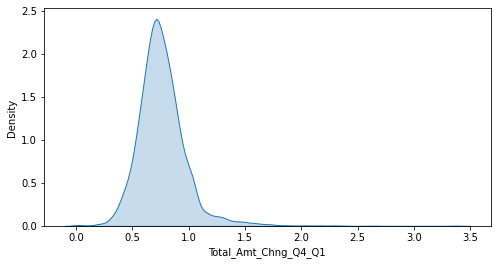

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Total_Trans_Amt
count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64
Probability Density Plot for Total_Trans_Amt


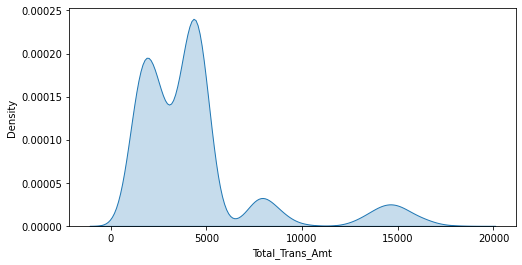

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Total_Trans_Ct
count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64
Probability Density Plot for Total_Trans_Ct


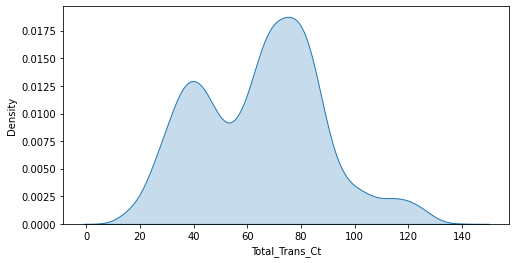

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Total_Ct_Chng_Q4_Q1
count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
Probability Density Plot for Total_Ct_Chng_Q4_Q1


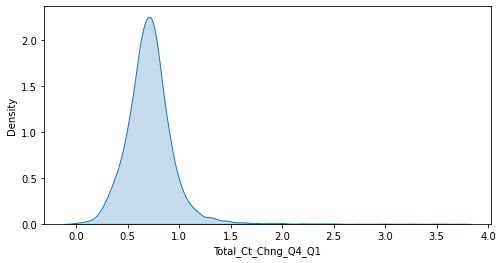

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X
Descriptive Statistics of Avg_Utilization_Ratio
count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64
Probability Density Plot for Avg_Utilization_Ratio


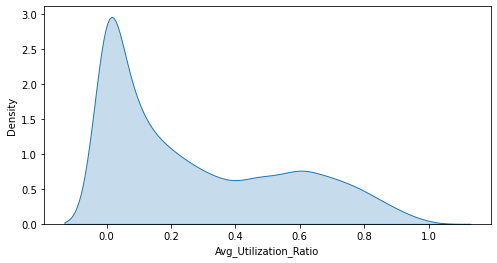

X--------------XX--------------XX--------------XX--------------XX--------------XX--------------X


In [16]:
for col, dtyp in dict(df.drop(['CLIENTNUM'], axis=1).dtypes).items():
    if dtyp.str == '|O':
        Categorical_Analysis(df[col])
    else:
        Numeric_Analysis(df[col])
    print("X--------------X"*6,)

## Understanding of Data From Descriptive Analysis

<ul>
    <li><b>CLIENTNUM: </b>Primary Key, No duplicates Not of much use as of now</li>
    <li><b>Attrition_Flag: </b>Target Feature, Categorical, Very unbalanced distribution of data, will see if we can use some kind of sampling technique to improve</li>
    <li><b>Customer_Age: </b>Discret Numerical Feature, I was expecting a skewd distribution, as older population are more prone to avoid using credit cards then the younger one.</li>
    <li><b>Gender: </b>Not being sexist, but its a little weird that there are more 'Female' Card holders than 'Men'.</li>
    <li><b>Dependent_count: </b>Discret Numerical Feature, an average family of 4 or less seems to be the case.</li>
    <li><b>Education: </b>Categorical Feature, gradutes seems to be most represented category, we might be able to combine a few categories into one based on there bad rate.</li>
    <li><b>Marital_Status: </b>Married people seems to be most represented here, it is possible that one customer might have more than one card in family, and drop a few to reduce liability</li>
    <li><b>Income_Category :</b>It is already binned, which causes some loss of info, and also I expected normal distribution, but it seems to be linear descending distribution as income increases.</li>
    <li><b>Card_Category :</b>Blue is overally dominant here, and others are way to small to add any useful info, we might drop this</li>
    <li><b>Months_on_book :</b>Normally distributed as expected, except for that weird peak, which might suggest tampering with original data, probably someone replace missing values with mean of data, causing such peak at mean, this is not good.</li>
    <li><b>Total_Relationship_Count :</b>Number of products owned by customer, we will see how it relates with attrition.</li>
    <li><b>Months_Inactive_12_mon :</b>It seems Inactivie users mostly comeback after 3 months max or probably drop out, a good hypothisis to check.</li>
    <li><b>Contacts_Count_12_mon :</b>Very similar to last column, as most people comeback by 3 months, most contact is done during that period to bring user back to spending, its possible that users who do not respond even after 3 months are more probable to drop off permanently</li>
    <li><b>Credit_Limit :</b>Has a weird bump at the end of the tail, worth checking further.</li>
    <li><b>Total_Revolving_Bal :</b> Total Revolving balance means, how much balance is left over after each last payment made by customer, or pending debt, seems most people payoff there debt or have none, but a large portion seems to carry a huge amount.</li>
    <li><b>Avg_Open_To_Buy :</b>Average open credit line over last 12 months, distribution very similar to credit_limit, might be correlated and thus redundunt</li>
    <li><b>Total_Amt_Chng_Q4_Q1 :</b>Not quite sure what it means, perhaps the percentage change in last 1 year in overall balance.</li>
    <li><b>Total_Trans_Amt :</b>Very uneven distribution,  perhaps will work better if we just bin it.</li>
    <li><b>Total_Trans_Ct :</b>A double hump  camel, this tells us there are high frequency users and low frequency users in our data, usually its the low frequency users who sticks with a bank longer, as they have less issues with there cards.</li>
    <li><b>Total_Ct_Chng_Q4_Q1 :</b>Not quite sure what this is, lets assume its point change in total transaction count</li>
    <li><b>Avg_Utilization_Ratio :</b>Card Utilization Ratio is debt/credit_limit at any given time,I am asummin the average is over 12 months, which would simply be<b> (Credit_Limit - Avg_Open_To_Buy)/Credit_Limit)</b> seems we already have some engineered columns here</li>
</ul>

#### This data seems heavely modified and engineered already, we must carefully avoid the trap of multicollinearity

## Multivariant Analysis

In [17]:
num_cols = [col for col in df.drop(['CLIENTNUM','Attrition_Flag'], axis=1).columns if df[col].dtype.str != '|O']
cat_cols = [col for col in df.drop(['CLIENTNUM','Attrition_Flag'], axis=1).columns if df[col].dtype.str == '|O']

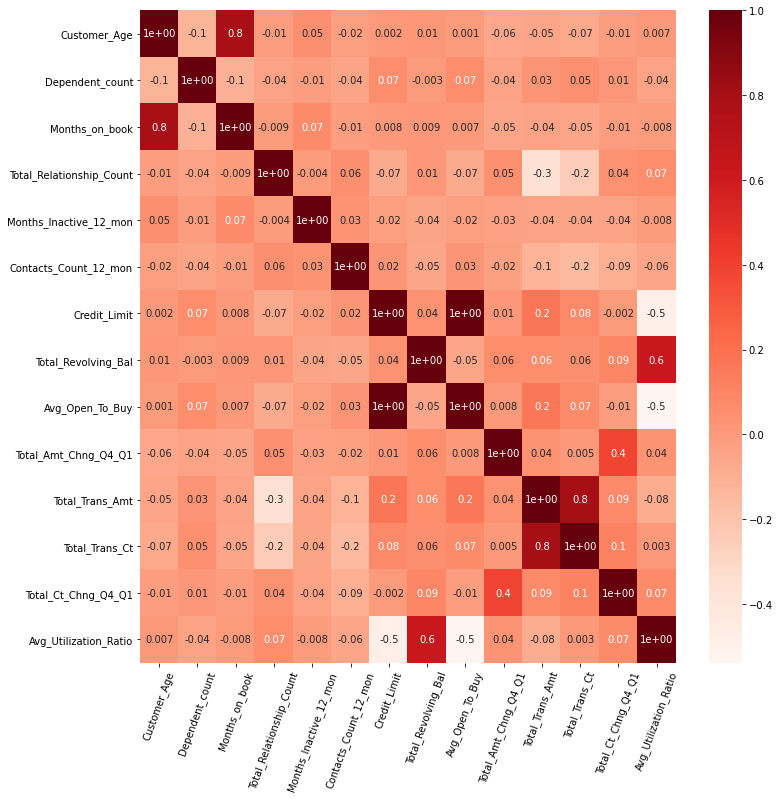

In [18]:
fig, ax = plt.subplots(figsize=(12,12))
fig = sns.heatmap(df[num_cols].corr(), fmt='.1', cmap='Reds', annot=True)
fig = plt.xticks(rotation=70)

<h3>Insights:</h3>

<ul>
    <li><b>Months_on_books-vs-Customer_Age:</b> The older the customer, the longer they have been with company, very strongly correlated, either have to drop one or find a way to combine that</li>
    <li><b>Credit_Limit -vs- Average_Open_To_Buy: </b> As expected, this is way similar as credit_limit, we can just drop one of the columns.</li>
    <li><b>Total_Trans_Amt -vs- Total_Trans_Ct: </b>The more transactions you do, the more amount you generate in debt, no surprise there.</li>
</ul>

In [19]:
# Getting Cramer's V for Categorical Correlation
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [20]:
n = len(cat_cols)
cat_corr = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        cat_corr[i,j] = cramers_v(df[cat_cols[i]],df[cat_cols[j]])

cat_corr = pd.DataFrame(cat_corr, index=cat_cols, columns=cat_cols)

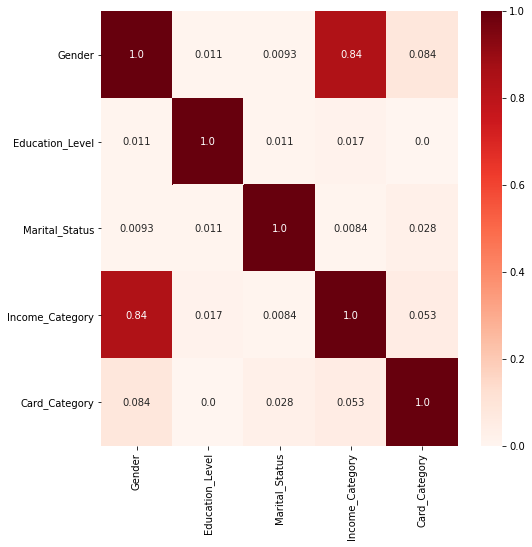

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
fig = sns.heatmap(cat_corr, fmt='.2', cmap='Reds', annot=True)
fig = plt.yticks(rotation=0)

In [22]:
pd.crosstab(df['Gender'],df['Income_Category'], margins='row')

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,All
Gender,,,,,,,
F,0,1014,0,0,3284,1060,5358
M,727,776,1402,1535,277,52,4769
All,727,1790,1402,1535,3561,1112,10127


<h3>Insights</h3>

No major correlation, other than <b>"Income_Category -vs- Gender"</b>,although majority of card holders are females, there income category is mostly on lower end, or unknonw. We will have to find a way to combine the two columns, to avoid unstable models.

## Feature Engineering

In [23]:
# Combine the Customer_Age and Months_on_book to get a new column so we can drop one of them and avoid correlation
Per_of_life_as_cust = df['Months_on_book']/(df['Customer_Age']*12) * 100
df['Per_of_life_as_cust'] = Per_of_life_as_cust
df[['Customer_Age','Per_of_life_as_cust']].corr()

,Customer_Age,Per_of_life_as_cust
Customer_Age,1.000000,0.012069
Per_of_life_as_cust,0.012069,1.000000


In [24]:
# Average Transaction amount gives us a better feature and also avoids correlation
Avg_Trans_Amt = df['Total_Trans_Amt']/df['Total_Trans_Ct']
df['Avg_Trans_Amt'] = Avg_Trans_Amt
df[['Avg_Trans_Amt','Total_Trans_Ct']].corr()

,Avg_Trans_Amt,Total_Trans_Ct
Avg_Trans_Amt,1.000000,0.553655
Total_Trans_Ct,0.553655,1.000000


In [25]:
df = df.drop(['Total_Trans_Amt','Months_on_book','Avg_Open_To_Buy','Card_Category'], axis=1)

In [26]:
X = df.drop(['CLIENTNUM','Attrition_Flag'], axis=1).copy()
y = (df['Attrition_Flag'].copy() == 'Attrited Customer')*1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55, test_size=0.3)

In [27]:
to_standardize = ['Customer_Age','Credit_Limit','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Ct',
                  'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Per_of_life_as_cust','Avg_Trans_Amt']
to_woe = [col for col in X_train.columns if col not in to_standardize]

In [28]:
ss = StandardScaler()
ss.fit(X_train[to_standardize])
X_train[to_standardize] = ss.transform(X_train[to_standardize])
X_test[to_standardize] = ss.transform(X_test[to_standardize])

### What is Weight of Evidence?

<b>The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who left company, and "Good Customers" refers to the customers who continued to use credit card.</b>

<b>Therefore a positive WOE mean more "Good Customers" than "Bad Customers", and vice versa for negative WOE. Absolute value of WOE tells us the seperation of two.</b>

![image.png](attachment:image.png)

<b>We can replace the categorical features with there respective WOE, rather than using dummy variables. This helps us avoid increasing dimensionality of our data</b>

### What is IV?

<b>IV stands for Information Value, it is useful in determining the predictive power of a feature based on there class seperation, using WOE</b>

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [29]:
target_flag = y_train == 1
N = len(y_train)
def WOE_Calculator(x):
    rows = list()
    #print(x.name)
    for attr in list(x.unique()):
        #print(attr)
        x_at = x[x == attr]
        n = len(x_at)
        good_per = (len(x_at[~target_flag])+0.5)/N * 100
        bad_per = (len(x_at[target_flag])+0.5)/N * 100
        woe = np.log(good_per/bad_per)
        iv = ((good_per - bad_per)/100)*woe
        rows.append([x.name, attr, n, good_per, bad_per, woe, iv])
    return pd.DataFrame(rows, columns=['Feature', 'Attribute', 'Count', 'Good%', 'Bad%', 'WOE', 'IV'])

In [30]:
df_iv = pd.DataFrame(columns=['Feature', 'Attribute', 'Count', 'Good%', 'Bad%', 'WOE', 'IV'])
for col in X_train[to_woe].columns:
    df_iv = pd.concat([WOE_Calculator(X_train[col]), df_iv])

In [31]:
df_iv.sort_values(by='WOE').head(10)

,Feature,Attribute,Count,Good%,Bad%,WOE,IV
5,Contacts_Count_12_mon,6,46,0.007054,0.656038,-4.532599,0.029416
3,Months_Inactive_12_mon,0,21,0.176354,0.134029,0.274437,0.000116
5,Months_Inactive_12_mon,4,301,2.913375,1.347348,0.771174,0.012077
6,Contacts_Count_12_mon,5,129,1.262698,0.571388,0.792937,0.005482
4,Total_Relationship_Count,2,857,8.697799,3.407167,0.937189,0.049583
5,Total_Relationship_Count,1,637,6.623871,2.377257,1.024733,0.043516
1,Months_Inactive_12_mon,3,2715,30.128386,8.189898,1.302566,0.285763
1,Contacts_Count_12_mon,4,992,11.053894,2.955700,1.319047,0.106819
2,Contacts_Count_12_mon,3,2398,27.066874,6.779063,1.384472,0.280879
4,Education_Level,Doctorate,315,3.576467,0.881772,1.400197,0.037731


In [32]:
df_iv.groupby('Feature')['IV'].sum()

Feature
Contacts_Count_12_mon       1.355250
Dependent_count             1.134123
Education_Level             1.134717
Gender                      1.137254
Income_Category             1.134782
Marital_Status              1.133264
Months_Inactive_12_mon      1.342013
Total_Relationship_Count    1.238998
Name: IV, dtype: float64

In [33]:
for col in X_train[to_woe].columns:
    woe_dict = dict(df_iv[df_iv['Feature'] == col][['Attribute','WOE']].set_index('Attribute')['WOE'])
    X_train[col] = X_train[col].apply(lambda x : woe_dict[x])
    X_test[col] = X_test[col].apply(lambda x : woe_dict[x])

## Model Development & Validation

In [34]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2542
           1       0.79      0.62      0.70       497

    accuracy                           0.91      3039
   macro avg       0.86      0.79      0.82      3039
weighted avg       0.91      0.91      0.91      3039

AUC of  ROC is :  0.7945394633734745


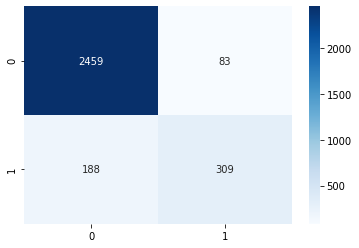

In [35]:
y_pred = clf.predict(X_test)
print(mtr.classification_report(y_test, y_pred))
print('AUC of  ROC is : ',mtr.roc_auc_score(y_test, y_pred))
fig = sns.heatmap(mtr.confusion_matrix(y_test, y_pred), fmt='', cmap='Blues', annot=True)

In [36]:
def gains_table(y_true, y_pred):
    y = pd.DataFrame(np.c_[y_true,y_pred[:,1]],columns=['y_true','y_pred']).sort_values(by='y_pred')
    y_true = y['y_true']
    y_pred = y['y_pred']
    n = len(y_true)
    y_pred = pd.Series(y_pred*100).sort_values(ascending=False)
    bins = [i for i in range(0,n-int(n/10),int(n/10))] + [n]
    rows = []
    cum_good = 0
    cum_bad = 0
    good_n = (y_true == 0).sum()
    bad_n = (y_true == 1).sum()
    for i in range(0,10):
        x = y_pred[bins[i]:bins[i+1]]
        max_prob = np.max(x)
        min_prob = np.min(x)
        mean_prob = np.mean(x)
        count = len(x)
        good = len(x[y_true == 0])
        bad = len(x[y_true == 1])
        good_per = np.round(good/count * 100,2)
        bad_per = np.round(bad/count * 100,2)
        cum_good = cum_good + good
        cum_bad = cum_bad + bad
        if bad == 0:
            fpr = np.inf
        else:
            fpr = good/bad
        cum_good_per = np.round(cum_good / good_n * 100,2)
        cum_bad_per = np.round(cum_bad / bad_n * 100,2)
        ks = cum_bad_per - cum_good_per
        rows.append([max_prob, mean_prob, min_prob, count, good, bad, good_per, bad_per,cum_good, cum_bad, fpr,
                     cum_good_per, cum_bad_per, ks])
    return pd.DataFrame(rows, columns=['Max Proba', 'Mean Proba', 'Min Proba', 'Count', 'Good', 'Bad', 'Good%', 'Bad%',
                                       'Cumalative Good', 'Cumalative Bad', 'False Positive Rate', 'Cumalative Good%',
                                       'Cumalative Bad%', 'KS'])

In [37]:
y_pred_prob = clf.predict_proba(X_test)
gains_table(y_test.values, y_pred_prob)

,Max Proba,Mean Proba,Min Proba,Count,Good,Bad,Good%,Bad%,Cumalative Good,Cumalative Bad,False Positive Rate,Cumalative Good%,Cumalative Bad%,KS
0,99.978146,84.234015,62.529651,303,42,261,13.86,86.14,42,261,0.160920,1.65,52.52,50.87
1,62.319181,42.203375,25.954706,303,176,127,58.09,41.91,218,388,1.385827,8.58,78.07,69.49
2,25.844401,16.845786,11.044423,303,247,56,81.52,18.48,465,444,4.410714,18.29,89.34,71.05
3,11.038092,7.928294,5.575967,303,278,25,91.75,8.25,743,469,11.120000,29.23,94.37,65.14
4,5.558210,4.192448,3.114979,303,292,11,96.37,3.63,1035,480,26.545455,40.72,96.58,55.86
5,3.110084,2.427419,1.824959,303,292,11,96.37,3.63,1327,491,26.545455,52.20,98.79,46.59
6,1.810494,1.385906,1.022410,303,298,5,98.35,1.65,1625,496,59.600000,63.93,99.80,35.87
7,1.011527,0.727311,0.490520,303,302,1,99.67,0.33,1927,497,302.000000,75.81,100.00,24.19
8,0.490048,0.331571,0.207288,303,303,0,100.00,0.00,2230,497,inf,87.73,100.00,12.27
9,0.207130,0.098754,0.001300,312,312,0,100.00,0.00,2542,497,inf,100.00,100.00,0.00


In [38]:
y_pred2 = (y_pred_prob[:,1] >= 0.11)*1

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      2542
           1       0.49      0.89      0.63       497

    accuracy                           0.83      3039
   macro avg       0.73      0.85      0.76      3039
weighted avg       0.90      0.83      0.85      3039

AUC of  ROC is :  0.8548232748180665


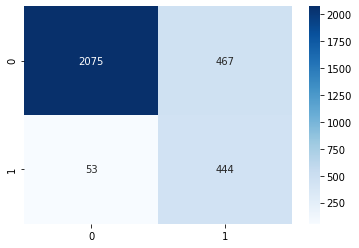

In [39]:
print(mtr.classification_report(y_test, y_pred2))
print('AUC of  ROC is : ',mtr.roc_auc_score(y_test, y_pred2))
fig = sns.heatmap(mtr.confusion_matrix(y_test, y_pred2), fmt='', cmap='Blues', annot=True)

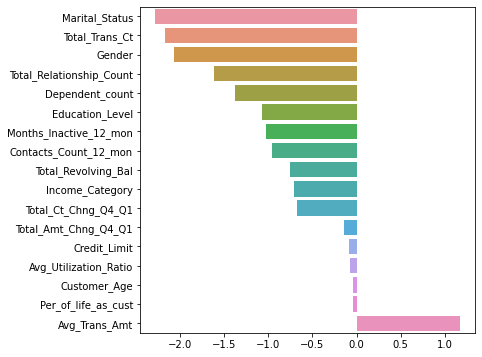

In [40]:
model_coef = pd.Series(dict(zip(list(X_train.columns),list(clf.coef_[0])))).sort_values()
fig,ax = plt.subplots(figsize=(6,6))
fig = sns.barplot(x=model_coef.values, y=model_coef.index)